# <center> Сегментация клиентов онлайн магазина подарков

## Постановка задачи


<center> <img src=https://salesupnow.ru/storage/app/media/pipeople.png align="right" width="300"/> </center>

Маркетинг — неотъемлемая часть любого бизнеса. Для повышения прибыли компании важно понимать своего клиента, его пожелания и предпочтения. С появлением электронной коммерции, или онлайн-продаж, стало намного проще собирать данные о клиентах, анализировать их, находить закономерности и реализовывать маркетинговые кампании.

Большинство интернет-магазинов используют инструменты веб-аналитики, чтобы отслеживать просмотры страниц, количество и поведение посетителей и коэффициент отказов. Но отчёта из Google Analytics или аналогичной системы может быть недостаточно для полного понимания того, как клиенты взаимодействуют с сайтом. Компаниям важно иметь возможность быстро и точно реагировать на перемены в поведении клиентов, создавая инструменты, которые обнаруживают эти изменения практически в режиме реального времени.

Машинное обучение помогает поисковой системе анализировать огромное количество данных о посетителях платформы, узнавать модели поведения профессиональных покупателей, определять категорию клиентов (например, лояльные/перспективные/новички/спящие/ушедшие) и выбирать правильную стратегию взаимодействия с ними.

Стоит также отметить, что компании, использующие машинное обучение на своих платформах электронной коммерции, могут постоянно повышать эффективность бизнес-процессов: настраивать товарную выборку персонально для каждого покупателя и предлагать выгодную цену в соответствии с бюджетом клиента и т. д. Эта задача относится к категории построения рекомендательных систем, речь о которых пойдёт в следующем разделе нашего курса.

> Как правило, наборы данных для электронной коммерции являются частной собственностью и, следовательно, их трудно найти среди общедоступных данных. Однако [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)  создал набор данных, содержащий фактические транзакции за 2010 и 2011 годы. С ним нам как раз и предлагается поработать в этом кейсе. 

> В нашем распоряжении будет набор данных, который содержит все транзакции, произошедшие в период с 01/12/2010 по 09/12/2011 для базирующейся в Великобритании компании, занимающейся онлайн-розничной торговлей. Компания в основном продает уникальные подарки на все случаи жизни. Многие клиенты компании являются оптовиками.


**Бизнес-задача:** произвести сегментацию существующих клиентов, проинтерпретировать эти сегменты и определить стратегию взаимодействия с ними.

**Техническая задача для вас как для специалиста в Data Science:** построить модель кластеризации клиентов на основе их покупательской способности, частоты заказов и срока давности последней покупки, определить профиль каждого из кластеров.

**Основные цели проекта:**
1. Произвести предобработку исходного набора данных о транзакциях.
2. Провести разведывательный анализ данных и выявить основные закономерности.
3. Сформировать набор данных о характеристиках каждого из уникальных клиентов.
4. Построить несколько моделей машинного обучения, решающих задачу кластеризации клиентов, определить количество кластеров и проинтерпретировать их.
5. Спроектировать процесс предсказания категории интересов клиента и протестировать вашу модель на новых клиентах.




## Данные и их описание

Данные представляют собой таблицу в формате CSV, в каждой строке которой содержится информация об уникальной транзакции.

Признаки, описывающие каждую транзакцию:

* InvoiceNo — номер счёта-фактуры (уникальный номинальный шестизначный номер, присваиваемый каждой транзакции; буква "C" в начале кода указывает на отмену транзакции);
* StockCode — код товара (уникальное пятизначное целое число, присваиваемое каждому отдельному товару);
* Description — название товара;
* Quantity — количество каждого товара за транзакцию;
* InvoiceDate — дата и время выставления счёта/проведения транзакции;
* UnitPrice — цена за единицу товара в фунтах стерлингов;
* CustomerID — идентификатор клиента (уникальный пятизначный номер, однозначно присваиваемый каждому клиенту);
* Country — название страны, в которой проживает клиент.



Импорт базовых библиотек:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn import mixture
from sklearn import manifold
from sklearn import pipeline
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn import cluster
from sklearn import metrics
from sklearn import model_selection
from sklearn import decomposition
from sklearn import ensemble
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score
from IPython.display import display, HTML

warnings.filterwarnings("ignore")

plt.rcParams["patch.force_edgecolor"] = True

import warnings 

from IPython.display import display, HTML

warnings.filterwarnings("ignore")

plt.rcParams["patch.force_edgecolor"] = True

NameError: name 'warnings' is not defined

## 1. Знакомство со структурой данных

Первым делом необходимо понять, с какими данными предстоит работать, и произвести базовую предобработку данных — перевести признаки в необходимые для дальнейшей работы форматы.

Познакомьтесь с исходными данными поближе:

* Проведите статистический анализ исходных данных, посмотрев на основные диапазоны исходных признаков.
* Узнайте, сколько уникальных клиентов совершали транзакции в указанный период.
* Узнайте, из каких стран совершались транзакции.
* Исследуйте данные на наличие пропусков и дубликатов.
* Переведите столбцы в корректные форматы (например, даты в формат datetime).

Прочитаем наш файл с исходными данными:

In [ ]:

data = pd.read_csv(
    "data.csv", 
    encoding="ISO-8859-1", 
    dtype={'CustomerID': str,'InvoiceID': str}
)
print('Data shape: {}'.format(data.shape))
data.head(5)

Data shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


Проведём анализ структуры таблицы.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


In [ ]:
data.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


По описанию задачи, в нашем распоряжении данные за год — проверим, так ли это.

Преобразуем столбец InvoiceDate в формат datetime. Посмотрим, за какой промежуток времени представлены данные:

In [ ]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
print('Date interval {} to {}'.format(data['InvoiceDate'].dt.date.min(), data['InvoiceDate'].dt.date.max()))

Date interval 2010-12-01 to 2011-12-09


Посмотрим какое максимальное и минимальное кол-во товаров было куплено за предоставляемый период

In [ ]:
print(f"Максимальное количество товаров в заказе: {data['Quantity'].max()}")
print(f"Минимальное количество товаров в заказе: {data['Quantity'].min()}")

Максимальное количество товаров в заказе: 80995
Минимальное количество товаров в заказе: -80995


Сколько, согласно данным, стоит самый дешёвый товар(стоимость товара не может быть меньше 0,учтем это) и самый дорогой товар

In [ ]:
print(f"Cтоимость самого дешевого товара: {data[data['UnitPrice'] >=0 ]['UnitPrice'].min()}")
print(f"Стоимость самого дорого товара: {data['UnitPrice'].max()} ")

Cтоимость самого дешевого товара: 0.0
Стоимость самого дорого товара: 38970.0 


Посмотрим сколько уникальных клиентов совершали транзакции в указанный период.

In [ ]:
print(f"Число уникальных клиентов: {data['CustomerID'].nunique()}")

Число уникальных клиентов: 4372


из каких стран совершались транзакции.

In [ ]:
data['Country'].value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


## 2. Преобразование, очистка и анализ данных

### 2.1. Преобразование и очистка данных о транзакциях

#### 2.1.1 Пропуски

Пропуски в столбце с идентификатором клиента (CustomerID) и описанием товара свидетельствуют о некорректных/незавершённых транзакциях. Удалите их из данных.

**Примечание.** Если посмотреть на распределение пропусков в столбцах Description и CustomerID, то можно заметить, что достаточно удалить строки, содержащие пропуски в столбце CustomerID, тогда пропуски в столбце Description удаляются автоматически.


Посмотрим сколько всего пропусков в нашем датасете

In [ ]:
print(f'Всего пропущенных значений: {data.isna().sum().sum()}')

Всего пропущенных значений: 136534


In [ ]:
# удаляем пропуски
data.dropna(inplace=True)
# Посмотрим сколько строк осталось после очистки данных
print(f'Осталось строк после очистки: {data.shape[0]}')

Осталось строк после очистки: 406829


#### 2.1.2. Дубликаты

Проверьте данные на наличие дубликатов. Удалите их из данных.


In [ ]:
print(f'Количество дублирующих записей: {data.duplicated().sum()}')
#Удалим дубликаты
data=data.drop_duplicates()
print(f'Количество строк в таблице после удаления дубликатов: {data.shape[0]}')

Количество дублирующих записей: 5225
Количество строк в таблице после удаления дубликатов: 401604


#### 2.1.3. Транзакции с отрицательным количеством товара

Из приведённых выше инсайтов о данных мы узнали все особенности отмены заказов. Когда мы будем сегментировать клиентов, мы будем определять их покупательскую способность. При расчёте покупательской способности нам будет очень важно учесть возвраты этого клиента.

Чтобы подсчитать количество возвратов, для начала нам надо определить, сколько уникальных товаров указано в транзакции (корзине) для каждой уникальной пары «клиент — заказ»:


In [ ]:
temp = data.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of products'})
nb_products_per_basket.head()

,CustomerID,InvoiceNo,Number of products
0,12346,541431,1
1,12346,C541433,1
2,12347,537626,31
3,12347,542237,29
4,12347,549222,24


**Примечание.** Более 16 % уникальных заказов являются возвратами. Интересный факт: если мы подсчитали количество транзакций, содержащих признак возврата, в изначальной таблице, где на каждый уникальный товар заведена отдельная строка, то мы получили бы, что количество возвратов менее 1 %. Однако это число было бы некорректным.

Создайте в ваших данных о транзакциях признак `QuantityCanceled`. Этот признак будет указывать на количество отменённого впоследствии товара для каждой транзакции, на которую найдётся противоположная ей транзакция с возвратом. Для транзакций, для которых не было возвратов, признак будет равен 0. Для транзакций, для которых указано отрицательное количество товара, но в данных отсутствует контрагент, признак будет пустым.

В качестве вспомогательного инструмента мы подготовили для вас функцию `get_quantity_canceled()`. Эта функция принимает на вход таблицу с транзакциями и возвращает объект `Series` — столбец, в котором указано количество отменённого впоследствии товара для каждой транзакции. Если транзакция не имеет контрагента, этот признак помечается как `NaN`.

Отметим, что эта функция не учитывает сложный случай, когда количество отменённого товара в транзакции-возврате больше, чем количество товара, которое указано в любой из отдельных транзакций на покупку (это случай, когда клиент сделал несколько заказов одного и того же товара, а потом оформил возврат на все товары разом). При желании вы можете самостоятельно модифицировать функцию для предобработки, чтобы учесть этот пограничный случай.

*Осторожно! Поиск отменённых транзакций занимает много времени из-за большого количества строк в таблице. Выполнение следующего кода может занять до 20 минут в зависимости от мощности компьютера.*

In [ ]:
def get_quantity_canceled(data):
    """Функция для создания признака количества отменённых заказов. 
    Функция принимает на вход таблицу и возвращает столбец, в котором указано количество отменённого впоследствии товара для кажой транзакции.
    Если транзакция с отрицательным количеством товара не имеет контрагента, данный признак помечается как NaN.

    Args:
        data (DataFrame): таблица с транзакциями

    Returns:
        Series: столбец с количеством отменённого товара
    """
    # Инициализируем нулями Series той же длины, что и столбцы таблицы.
    quantity_canceled = pd.Series(np.zeros(data.shape[0]), index=data.index)    
    negative_quantity = data[(data['Quantity'] < 0)].copy()
    for index, col in negative_quantity.iterrows():
        # Создаём DataFrame из всех контрагентов
        df_test = data[(data['CustomerID'] == col['CustomerID']) &
                       (data['StockCode']  == col['StockCode']) & 
                       (data['InvoiceDate'] < col['InvoiceDate']) & 
                       (data['Quantity'] > 0)].copy()
        # Транзация-возврат не имеет контрагента — ничего не делаем
        if (df_test.shape[0] == 0): 
            # Помечаем столбец как пропуск
            quantity_canceled.loc[index] = np.nan
        # Транзакция-возврат имеет ровно одного контрагента
        # Добавляем количество отменённого товара в столбец QuantityCanceled 
        elif (df_test.shape[0] == 1): 
            index_order = df_test.index[0]
            quantity_canceled.loc[index_order] = -col['Quantity']       
        # Транзакция-возврат имеет несколько контрагентов
        # Задаём количество отменённого товара в столбец QuantityCanceled для той транзакции на покупку,
        # в которой количество товара больше количества товаров в транзакции-возврате.
        elif (df_test.shape[0] > 1): 
            df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
            for ind, val in df_test.iterrows():
                if val['Quantity'] < -col['Quantity']: 
                    continue
                quantity_canceled.loc[ind] = -col['Quantity']
                break    
    return quantity_canceled

data['QuantityCanceled'] = get_quantity_canceled(data)

Подсчитайте суммарное количество отмененных товаров в столбце QuantityCanceled.


In [ ]:
print(f"Количество отменненых товаров :{data['QuantityCanceled'].sum()}")

Количество отменненых товаров :245266.0


*Осторожно! Поиск отмененных транзакций занимает достаточно длительное время из-за количества строк в таблице. Выполнение следующего кода может занять до 20 минут в зависимости от компьютера.*

Узнайте, сколько транзакций в данных не имеют контрагентов, и, если их количество невелико, удалите их из данных.

Когда вы разобрались с возвратами, удалите транзакции с отрицательным количеством товара — они нам больше не нужны.



In [ ]:

print(f"Количество транзакций в данных которые не имеют контрагентов: {data[data['QuantityCanceled'] =='NaN']['QuantityCanceled'].count()}")


Количество транзакций в данных которые не имеют контрагентов: 0


удалим транзакции с отрицательным количеством товара — они нам больше не нужны

In [ ]:
data = data[data['Quantity'] > 0]
data.shape[0]

392732

#### 2.1.4. Специализированные транзакции

Следующая задача — обработать специальные виды транзакций, которые обозначаются латинскими буквами.

В данных присутствует шесть специальных видов транзакций. С помощью регулярных выражений найдите такие коды товаров (StockCode), которые начинаются с латинских букв (при этом коды могут содержать цифры).

**Подсказка.** В качестве шаблона для поиска используйте строку '^[a-zA-Z]+'.

Чтобы понять, что означают эти коды, можно заглянуть в столбец с описанием (Description), например POST означает почтовые расходы, C2 — расходы на транспортировку, BANK CHARGES — банковские расходы.

Специальные операции не характеризуют покупательскую способность клиентов, так как не относятся напрямую к их покупкам, поэтому такие записи нам не нужны. Удалите все специальные транзакции из таблицы.

In [ ]:
data['SpecialTransaction']=data['StockCode'].str.contains(pat ='^[a-zA-Z]+',regex=True) 
print(f"Коды специальных видов транзакций:{data[data['SpecialTransaction']]['StockCode'].unique()}")



Коды специальных видов транзакций:['POST' 'C2' 'M' 'BANK CHARGES' 'PADS' 'DOT']


Специальные операции не характеризуют покупательскую способность клиентов,
так как не относятся напрямую к их покупкам, поэтому такие записи нам не нужны.Удалим их и посмотрим сколько записей у нас останется

In [ ]:
data.drop(index=data[data['SpecialTransaction']].index, inplace=True)
data.drop(columns=['SpecialTransaction'], inplace=True)
print(f"Количество записей в датасете после удаления ненужных записей :{data.shape[0]}")


Количество записей в датасете после удаления ненужных записей :391183


#### 2.1.5. Транзакции с товарами без стоимости

При просмотре описательных статистик можно заметить, что на некоторые товары установлена цена в 0 фунтов стерлингов. Таких транзакций оказывается менее 1 % — можно удалить их.

In [ ]:
data = data[data['UnitPrice'] != 0]
print(f"Количество строк после отчистки: {data.shape[0]}")

Количество строк после отчистки: 391150


#### 2.1.6. Общая стоимость товаров в транзакции

Добавьте в ваш датасет общую цену заказа (TotalPrice). Она рассчитывается как:
 
 **общая цена = цена за единицу товара * (количество товаров в заказе - количество возвращённых товаров).**

Этот признак впоследствии поможет вам рассчитать покупательскую способность каждого из клиентов.

In [ ]:
data['TotalPrice']=data['UnitPrice']*(data['Quantity']-data['QuantityCanceled'])



In [ ]:
#сохраняем результат
data.to_csv('data_clean.csv', index=False)

In [ ]:
data_clean=pd.read_csv('data_clean.csv')
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391150 entries, 0 to 391149
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   InvoiceNo         391150 non-null  int64  
 1   StockCode         391150 non-null  object 
 2   Description       391150 non-null  object 
 3   Quantity          391150 non-null  int64  
 4   InvoiceDate       391150 non-null  object 
 5   UnitPrice         391150 non-null  float64
 6   CustomerID        391150 non-null  int64  
 7   Country           391150 non-null  object 
 8   QuantityCanceled  391150 non-null  float64
 9   TotalPrice        391150 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 29.8+ MB


Помимо рекомендованных преобразований, вы также можете придумать собственные и применить их к исходным данным.
После завершения предобработки сохраните результат очищения данных в отдельный файл, чтобы впоследствии вам не приходилось повторять эти действия.


### 2.2. Разведывательный анализ

После предобработки исходных данных произведите разведывательный анализ и исследуйте транзакции, ответив на следующие вопросы:

* Клиенты из каких стран покупают больше и чаще?
* Какие страны приносят наибольшую сезонную выручку?
* Присутствует ли в продажах сезонность (когда покупают чаще)?
* Сгруппируйте данные по датам и часам совершения транзакции и найдите количество заказов на каждый день-час. Затем найдите среднее количество ежедневно поступающих заказов в каждый из часов.
* Каково распределение среднего количества ежедневно поступающих заказов по времени суток (часу совершения транзакции)? 

**Примечание.** Вы можете сформулировать и другие вопросы. Главная цель — извлечь максимум понятной информации из исходных данных.

Свои рассуждения сопроводите графиками и диаграммами.



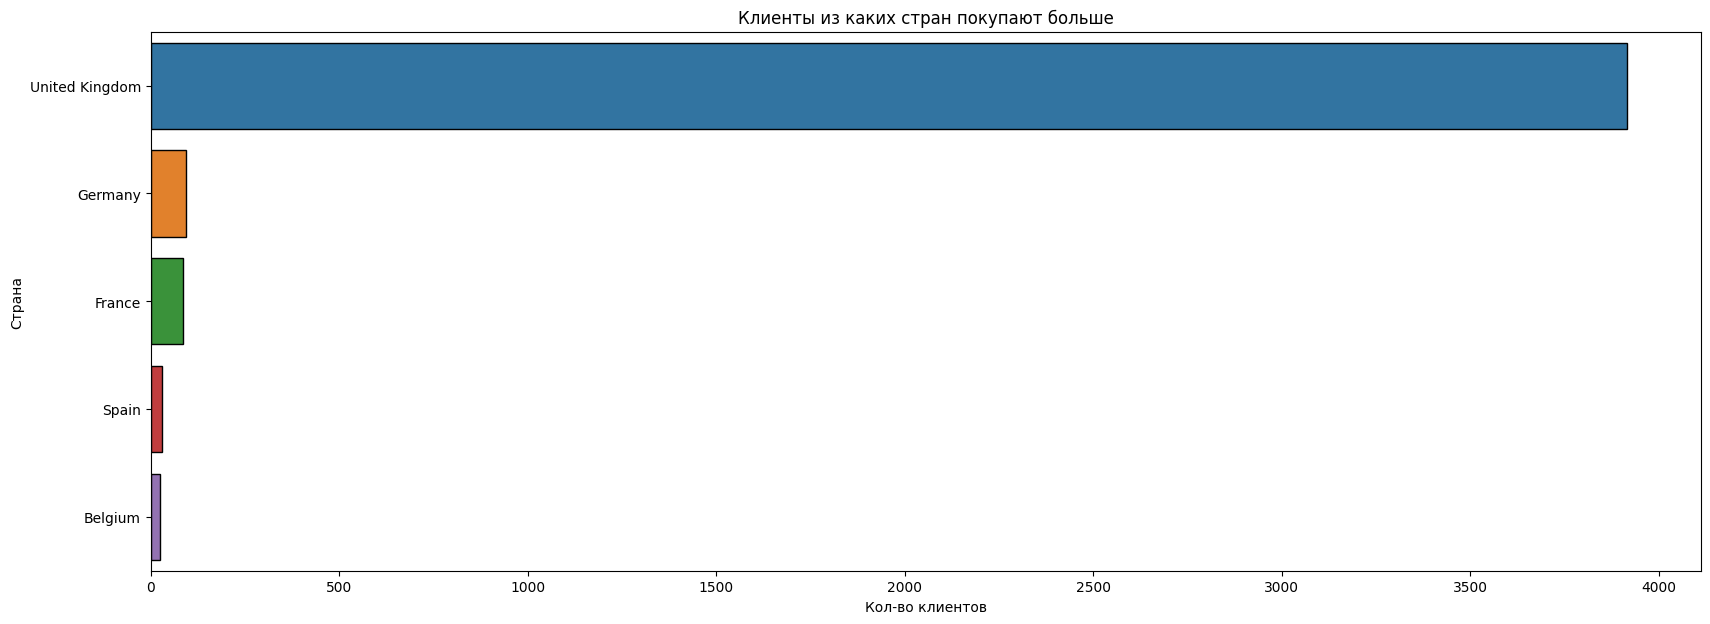

In [ ]:
#сгруппируем по кол-во уникальных клиентов в стране где совершались покупки
grouped_by_customer = data_clean.groupby('Country')['CustomerID'].nunique()
fig = plt.figure(figsize=(20,7))
barplot = sns.barplot(
    data=data_clean,
    x=grouped_by_customer,
    y=grouped_by_customer.index,
    order=data_clean.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False).index[:5]
      )
barplot.set_title('Клиенты из каких стран покупают больше');
barplot.set (xlabel='Кол-во клиентов', ylabel='Страна');



Как видно из графика клиенты  совершающие покупки больше всего  из стран Великобритания,Германия,Франция,Испания и Бельгия

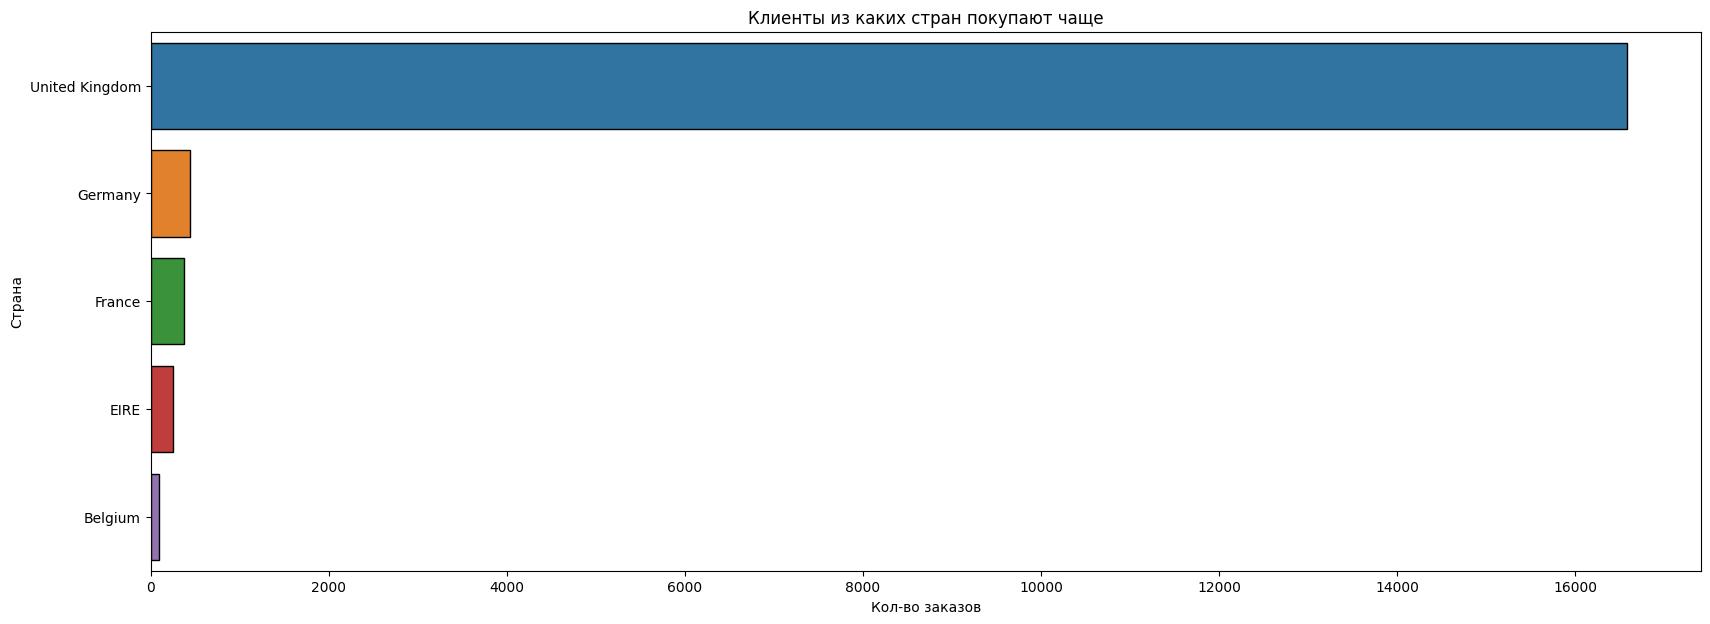

In [ ]:
zakaz = data_clean.groupby('Country')['InvoiceNo'].nunique()
fig = plt.figure(figsize=(20,7))
zakaz = sns.barplot(
    data=data_clean,
    x=zakaz,
    y=zakaz.index,
    order=data_clean.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False).index[:5]
      )
zakaz.set_title('Клиенты из каких стран покупают чаще');
zakaz.set (xlabel='Кол-во заказов', ylabel='Страна');

Как видно из графика клиенты  совершают покупки чаще всего  из стран Великобритания,Германия , Франция,Ирландия(EIRE) и Бельгия

Посмотрим какие страны приносят наибольщую выручку

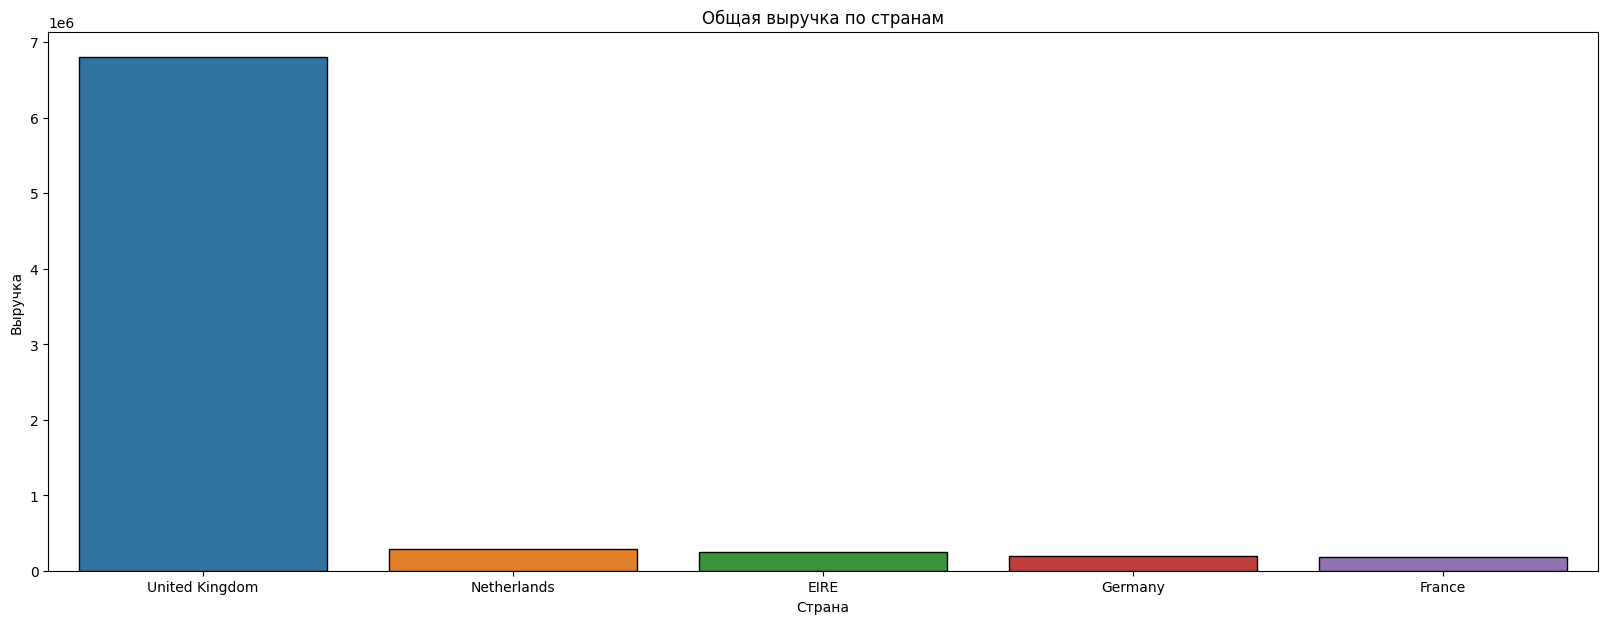

In [ ]:
#Сгруппируем выручку по странам
total_price = data_clean.groupby('Country')['TotalPrice'].sum()
#строим график
fig = plt.figure(figsize=(20,7))
vyruchca = sns.barplot(
    x=total_price.index,
    y=total_price,
    order=data_clean.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).index[:5])
vyruchca.set_title('Общая выручка по странам');
vyruchca.set (xlabel='Страна', ylabel='Выручка');

Лидером по выручке является Великобритания,а на втором и третьем месте Нидерланды и Ирландия(EIRE), хотя данные страны не являются лидерами по количеству заказчиков в стране и количеству заказов.Что очень интересно

Посмотрим на выручку по месяцам и проанализируем есть ли сезонность по покупкам в нашем магазине

In [ ]:
#Преобразуем столбец InvoiceDate в формат времени и создадим новые временные признаки месяц,день недели,и часы
data_clean['InvoiceDate'] = pd.to_datetime(data_clean['InvoiceDate'])
data_clean['Month'] = data_clean['InvoiceDate'].dt.month
data_clean['DayOfWeek'] = data_clean['InvoiceDate'].dt.day_name()
data_clean['Hour'] = data_clean['InvoiceDate'].dt.hour


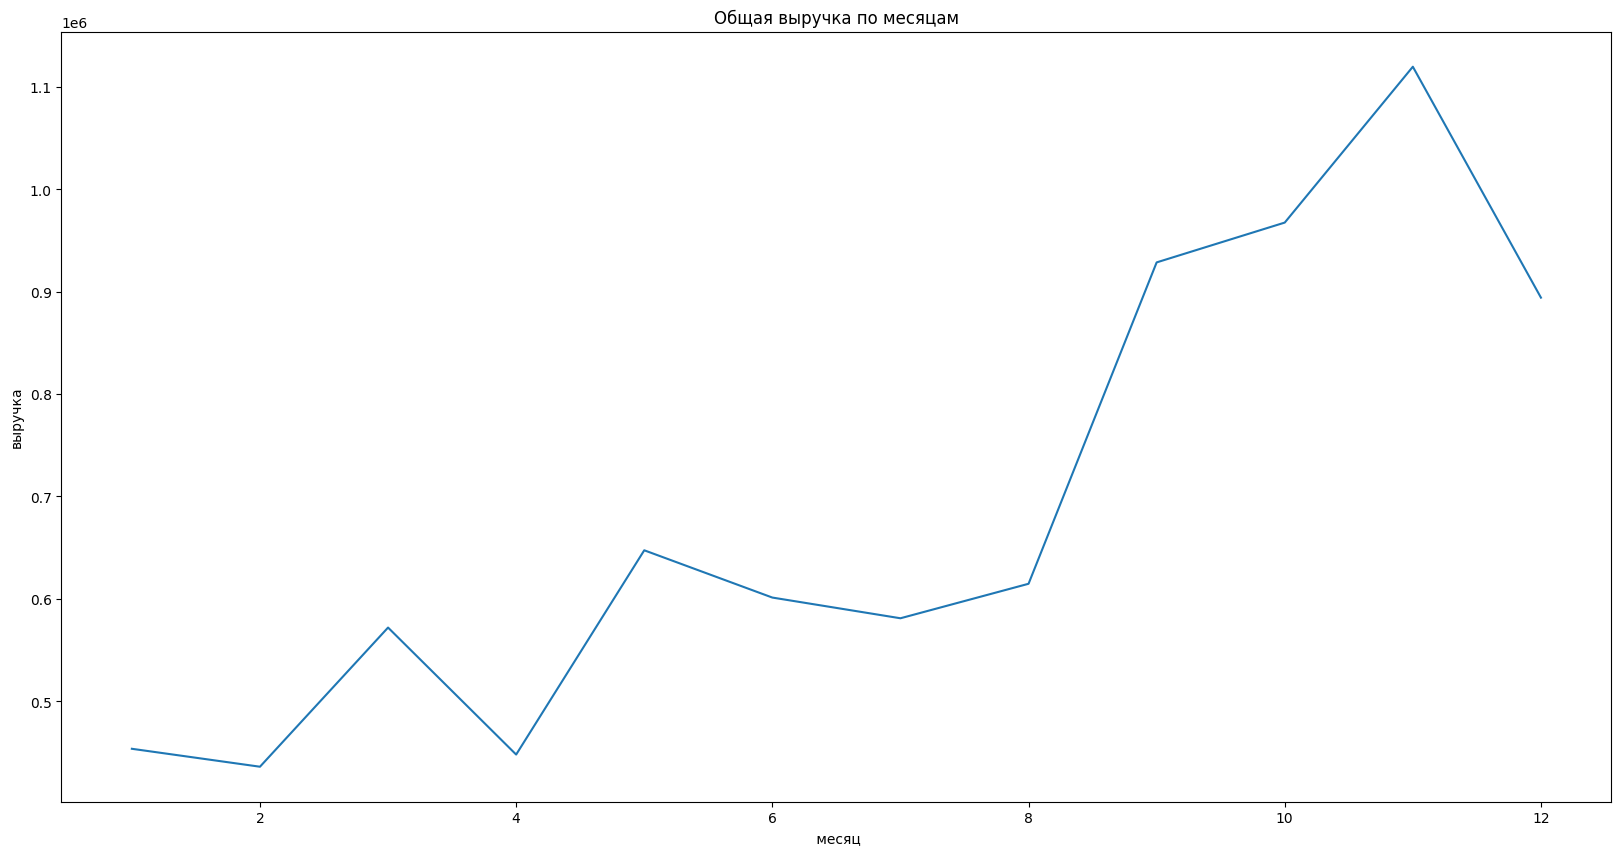

In [ ]:
#строим график выручки по странам по месяцам
total_price_month = data_clean.groupby('Month')['TotalPrice'].sum()
fig = plt.figure(figsize=(20,10))
vyruchca_month = sns.lineplot(
    total_price_month,
    x=total_price_month.index,
    y=total_price_month    
    )
vyruchca_month.set_title('Общая выручка по месяцам');
vyruchca_month.set (xlabel=' месяц', ylabel='выручка');

Как видно из графика, пик покупок приходится на ноябрь.
Кол-во покупок начинаем расти с августа и падает после декабря.
Можно уверенно сказать,что сезонность есть.
И это можно легко объяснить, с августа начинается подготовка к школе, потом распродажи новогодние, рождество и новый год.


Какое среднее количество заказов по дням недели

In [ ]:
week_invoice = data_clean.groupby('DayOfWeek')['InvoiceNo'].count().sort_values()
#строим график

week_invoice_bar= px.bar(
    week_invoice,
    x=week_invoice.index,
    y=week_invoice,
    labels={'x':'День недели', 'y':'Количество заказов'},
    title='среднее количество заказов по дням недели'
)
week_invoice_bar.show()

Больше всего заказов у нас в четверг.
А вот в субботу у нас нет ни одного заказа.
Можно предположить ,что по четвергам в магазине проводятся супер скидки,а в субботу возможно магазин вообще не работает

Выделите дату из признака времени совершения транзакции. Сгруппируйте данные по датам и часам совершения транзакции и найдите количество заказов на каждый день-час. Затем найдите среднее количество ежедневно поступающих заказов в каждый из часов.
Построем визуализацию, отражающую распределение среднего количества ежедневно поступающих заказов по времени суток (часу совершения транзакции).

In [ ]:
# Выделите дату из признака времени совершения транзакции
data_clean['Date'] = data_clean['InvoiceDate'].dt.date

# строим сводную таблицу и вычисляем по ней среднее количество заказов
# по датам и часам совершения  и находим среднее количество заказов на каждый день-час
pivot_mean = data_clean.pivot_table(
    values='InvoiceNo',
    index='Date',
    columns='Hour',
    aggfunc='count', 
    fill_value=0
).mean()
#строим график
hour_invoice_bar= px.bar(
    pivot_mean ,
    x=pivot_mean.index,
    y=pivot_mean,
    labels={'x':'Часы', 'y':'Количество заказов'},
    title='среднее количество заказов по часам'
)
hour_invoice_bar.show()

Больше всего заказов совершается в интервале от 10 до 15 часов 
Начиная с 21 часа  и до 6(не включительно) утра заказы не поступают.Видимо в этот период времени магазин заказы не принимает

### 2.3. Построение RFM-таблицы и поиск RFM-выбросов

Мы добрались до самой интересной части нашей задачи. Нам предстоит сформировать признаки, на основе которых мы будем производить сегментацию клиентов.

Для этого давайте познакомимся с очень популярным методом для анализа потребительской ценности под названием RFM. 

<center> <img src=https://miro.medium.com/max/1400/1*uYQjy9SUjW7iWHc2gGanQQ.png align="right" width="400"/> </center>

Метод заключается в группировке клиентов на основе следующих параметров:
* Recency (Давность) — давность последней покупки клиента;
* Frequency (Частота) — общее количество покупок клиента;
* Monetary Value (Денежная ценность) — сколько денег потратил клиент.


Суть RFM-анализа состоит в том, что мы разделяем всех клиентов на группы в зависимости от того, как давно они сделали последнюю покупку, как часто покупали и насколько большой была сумма их заказов. 

Например, вот так может выглядеть интерпретация кластеров для случая RF-сегментации (анализа на основе давности и частоты заказов клиента):

<img src=https://retailrocket.ru/wp-content/uploads/2017/06/rfm-1.png>

Задача маркетологов — вести клиента в зону лояльных.

Мы можем рассчитать RFM-характеристики для каждого из клиентов в нашем датасете и на их основе с помощью методов кластеризации построить подобные сегменты клиентов, привязанные к нашим данным.

Чтобы получить RFM-таблицу, нам необходимо сгруппировать данные по идентификаторам клиента и рассчитать следующие  агрегированные характеристики:

* Recency для i-го клиента рассчитывается как разница между датой и временем последнего заказа и точкой отсчёта, переведённая в дни:
    $$t_0-max(t_{i1}, t_{i2},..., t_{iM})$$

    где $t_{ij}$ — дата и время совершения i-ым клиентом своей j-ой покупки.

    В качестве точки отсчёта $t_0$ берём дату на один день «старше», чем все наши данные. Это будет 10 декабря 2011 года (в формате datetime — '2011-12-10 00:00:00').

* Frequency рассчитывается как общее количество уникальных заказов, которые совершил i-ый клиент.
* Monetary Value рассчитывается как общая сумма денег, которую i-ый клиент потратил на наши товары (с учётом возвратов).

Когда вы рассчитаете все характеристики, не забудьте дать столбцам результирующей таблицы соответствующие названия.

In [ ]:
# вычисляем давность последних покупок клиента
Recency = data_clean['Date'].max() - data_clean.groupby('CustomerID')['Date'].max()

# вычисляем общее количество покупок клиента
Frequency = data_clean.groupby('CustomerID')['InvoiceNo'].nunique()

# вычисляем сколько суммарно принёс прибыли каждый клиент
Monetary = data_clean.groupby('CustomerID')['TotalPrice'].sum()

# создаём RFM-таблицу
rfm_table = pd.DataFrame({
        'Recency': Recency.values,
        'Frequency': Frequency.values,
        'Monetary': Monetary.values
    },
    index = Recency.index
)

# понижаем размерность признаков по типу занимаемых данных
rfm_table['Recency'] = rfm_table['Recency'].dt.days
rfm_table[['Recency', 'Frequency']] = rfm_table[['Recency', 'Frequency']].astype('int16')

# выводим результат
rfm_table.head(5)


,Recency,Frequency,Monetary
CustomerID,,,
12346,325,1,0.00
12347,2,7,4310.00
12348,75,4,1437.24
12349,18,1,1457.55
12350,310,1,294.40


In [ ]:
#Посмотрим размерность
rfm_table.shape

(4334, 3)

После того как вы подготовите RFM-таблицу, визуализируйте каждую из трёх компонент, например, в виде коробчатых диаграмм (boxplot). Вы получите примерно следующие результаты (графики могут отличаться в зависимости от того, как вы выполните предобработку данных):

In [ ]:
boxes = [px.box(rfm_table, x=column) for column in rfm_table.columns]
fig = make_subplots(
    rows=1, cols=3, 
    subplot_titles=(
        "Recency","Frequency", "Monetary"
    )
)

for i, box in enumerate(boxes):
    fig.add_trace(boxes[i]['data'][0], row=1, col=i+1)

fig.update_layout(showlegend=True)
#fig.write_html('plotly/boxplot_1.html')
fig.show()

Что интересного здесь можно увидеть? Есть клиенты с аномально большим количеством сделанных заказов (более 100 штук), а также клиенты, общая стоимость заказов которых превышает 190 тысяч фунтов стерлингов.

Чем это плохо? Выбросы могут отрицательно сказаться на результатах работы методов кластеризации, неустойчивых к ним, например алгоритма KMeans, поэтому хотелось бы от них избавиться. Однако терять много ценных данных о клиентах тоже не хочется, поэтому ограничимся верхней границей соответствующей квантили уровня 0.95. Таким образом, мы удалим данные тех клиентов, для которых значение параметра Frequency или параметра Monetary выше, чем у 95 % клиентов.


In [ ]:
# задаём пороговые знаяения
frequency_clean = rfm_table['Frequency'] <= rfm_table['Frequency'].quantile(0.95)
monetary_clean = rfm_table['Monetary'] <= rfm_table['Monetary'].quantile(0.95)

# формируем датафрейм
rfm_table_clean = rfm_table[frequency_clean & monetary_clean]

In [ ]:
#Посмотрим размерность после отчистки
print(f"Размерность нашего датафрейма после отчистки:{rfm_table_clean.shape}")

Размерность нашего датафрейма после отчистки:(4044, 3)


## 3. Моделирование и оценка качества моделей

### 3.1. Кластеризация на основе RFM-характеристик

Чтобы результаты кластеризации было удобнее интерпретировать, вы можете уменьшить размерность исходных признаков до двух компонент.

**Подсказка.** Чтобы методы понижения размерности работали стабильно, данные необходимо стандартизировать/нормализовать. Для удобства оберните эти шаги по предобработке данных в pipeline.

Произведите предобработку исходных данных. На основе RFM-признаков кластеризуйте клиентов онлайн-магазина подарков с помощью известных вам методов (используйте минимум три метода).

Подберите оптимальное количество кластеров для выбранных методов с помощью коэффициента силуэта, перебирая возможные значения от 3 до 10 включительно (большее или меньшее количество кластеров будет нерелеватно для маркетинга). 

Выберите алгоритм с наибольшим коэффициентом силуэта, сделайте предсказание меток кластеров.


In [ ]:
#загружаем необходимые библиотеки
from sklearn import mixture
from sklearn import manifold
from sklearn import pipeline
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn import cluster
from sklearn import metrics
from sklearn import model_selection
from sklearn import decomposition
from sklearn import ensemble
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score
import warnings 

from IPython.display import display, HTML

warnings.filterwarnings("ignore")

plt.rcParams["patch.force_edgecolor"] = True

Чтобы методы понижения размерности работали стабильно, данные необходимо стандартизировать/нормализовать. Для удобства обернем эти шаги по предобработке данных в pipeline.

In [ ]:
pipeline = Pipeline([('scaler', preprocessing.StandardScaler()), ('pca', decomposition.PCA(n_components=2))])
rfm_table_processed = pd.DataFrame(pipeline.fit_transform(rfm_table_clean),columns=['axis-1', 'axis-2'])

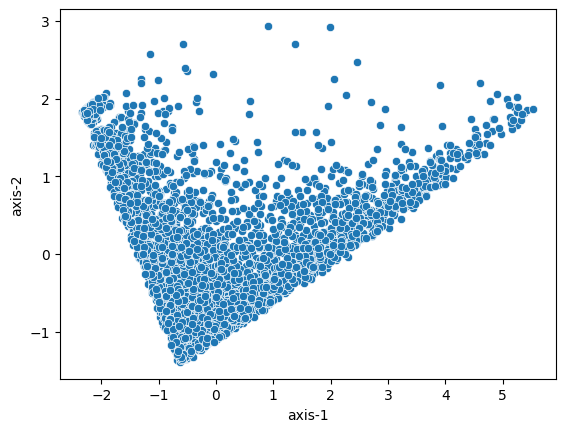

In [ ]:
sns.scatterplot(data=rfm_table_processed, x='axis-1', y='axis-2');

Произведем кластеризацию клиентов онлайн-магазина подарков с помощью использовать метод К-средних, EM-кластеризацию и Аггломеративную Иерархическую кластеризацию.Создадим Функцию подбирающую различные значения количества кластеров для выбранных алгоритмов кластеризации(КMeans, EM-кластеризацию и Аггломеративную Иерархическую кластеризацию.), производем подсчет  коэффициента силуэта, заносит в соответствующий словарь пару "число кластеров - значение коэффициента", и возвращает либо график изменения КС в зависимости от числа кластеров, либо сам словарь.


In [ ]:
def clustering_optimisation(X, algorithm, ramdom_state=42, plot=False):
      
    scores = {}
    
    for i in range(3, 11):
        if algorithm == 'kmeans':
            model = KMeans(n_clusters=i, n_init=10, random_state=42)
        elif algorithm == 'agglomerative':
            model = AgglomerativeClustering(n_clusters=i)
        elif algorithm == 'EM':
            model = GaussianMixture(n_components=i, random_state=42)
        
        y = model.fit_predict(X)
        
        scores[i] = silhouette_score(X, y, random_state=42)
        
    if plot:
        plt.xlabel("cluster", fontsize=12)
        plt.ylabel("silhouette", fontsize=12)
        plt.title(f"silhouette_score: {algorithm}", fontsize=12)

        plt.plot(list(scores.keys()), 
                 list(scores.values()), 
                 'xb-')
    else:
        return scores

Визиализируем Kmeans

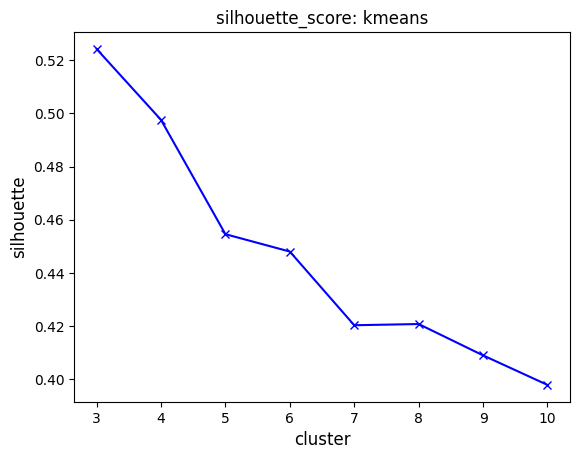

In [ ]:
clustering_optimisation(rfm_table_processed, 'kmeans', plot=True)

Как мы видим оптимальное количество кластеров 3, кофициент силуета 0.52

Визиализируем EM-кластеризацию

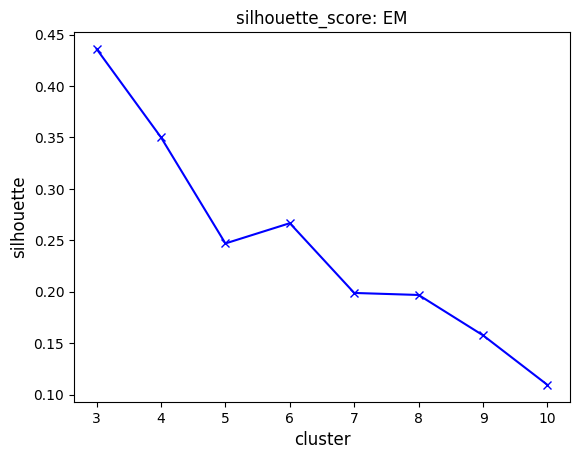

In [ ]:
clustering_optimisation(rfm_table_processed, 'EM', plot=True)

Как мы видим оптимальное количество кластеров 3, кофициент силуета 0.43

Визиализируем Аггломеративную Иерархическую кластеризацию

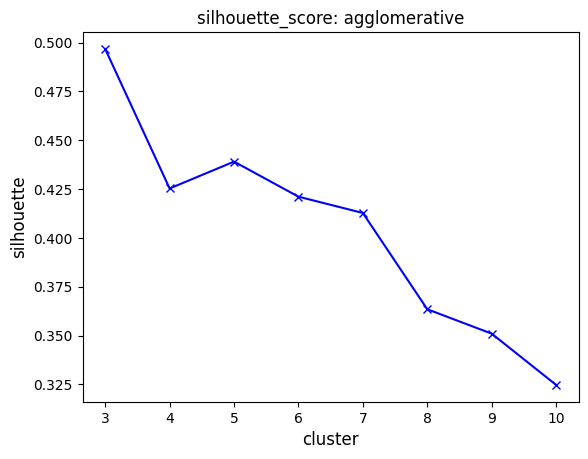

In [ ]:
clustering_optimisation(rfm_table_processed, 'agglomerative', plot=True)

Как мы видим оптимальное количество кластеров 3, кофициент силуета 0.49

Ввывод:судя по значениям коэффициента силуэта, указывают оптимальное количество кластеров - 3 для всех алгоритмов.
Наилучшим себя показал KMeans ,так как коэффициент силуэта  самый высокий.

### 3.2. Интерпретация результатов кластеризации

Перейдём к интерпретации полученных кластеров.

#### 3.2.1. Визуализация кластеров

Визуализируйте результаты в виде 3D-диаграммы с осями Recency, Frequency и Monetary. Проанализируйте полученную диаграмму и попробуйте понять, какие кластеры у вас получились.

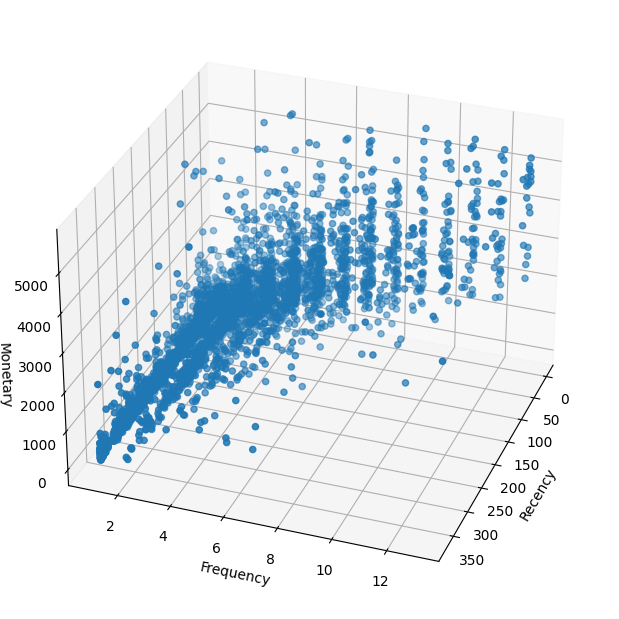

In [ ]:
# создадим трёхмерный объект
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
# добавим дополнительную ось в объект картинки
fig.add_axes(ax)
ax.azim = 20
ax.elev = 30

# визуализируем данные, передав значения x, y, z, а также информацию о группировке данных по цветам
ax.scatter(
    rfm_table_clean['Recency'].to_list(), 
    rfm_table_clean['Frequency'].to_list(),
    rfm_table_clean['Monetary'].to_list()
)
# добавим оси
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary');

Обучите лучшую модель с подобранным ранее количеством кластеров 

In [ ]:
kmeans = cluster.KMeans(n_clusters=3, random_state=42)
kmeans.fit(rfm_table_processed)
rfm_table_cleaned_kmeans =rfm_table_clean.copy()
rfm_table_cleaned_kmeans['K-Means_Cluster_ID'] = kmeans.labels_
rfm_table_processed['K-Means_Cluster_ID'] =kmeans.labels_
rfm_table_processed['K-Means_Cluster_ID'].value_counts()

K-Means_Cluster_ID
2    2269
0     999
1     776
Name: count, dtype: int64

Визуализируем результаты кластеризации:

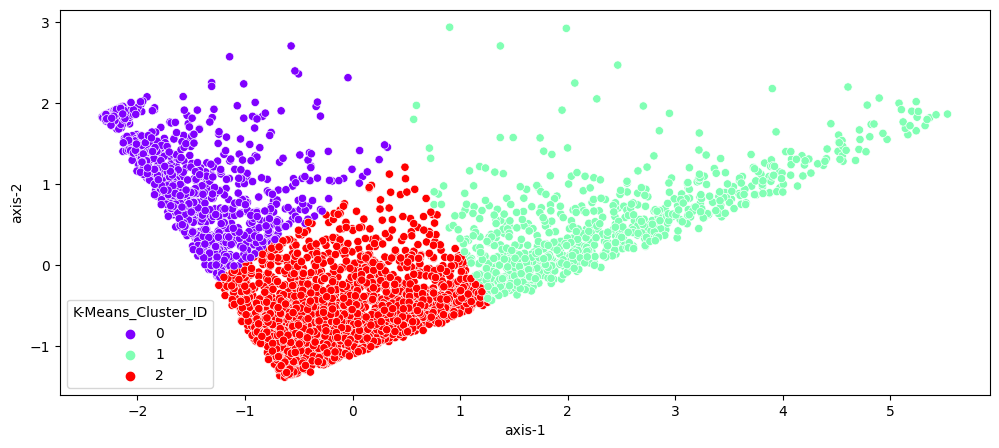

In [ ]:
fig = plt.figure(figsize=(12, 5))
sns.scatterplot(
    data=rfm_table_processed, 
    x='axis-1', 
    y='axis-2', 
    hue='K-Means_Cluster_ID',
    palette='rainbow'
);

самый большой кластер 2, в который попало 2269 клиентов.

У нас есть три типа клиентов. Давайте попробуем составить профиль для этих типов

#### 3.2.2. Построение профиля кластеров

Далее составьте так называемый профиль кластеров. Для этого вам необходимо вернуться от декомпозированных данных (если вы производили понижение размерности) к RFM-таблице (очищенной от выбросов).

Сгруппируйте RFM-таблицу по полученным кластерам и рассчитайте среднее по каждому из признаков.

Чтобы результаты было проще интерпретировать, давайте познакомимся с одним из способов визуализации профиля кластеров — **Radar Chart** (полярная диаграмма, или диаграмма паутины). Это графическое представление значений нескольких эквивалентных категорий в форме паутины.

Radar Chart часто используется при определении профиля кластеров. На концах паутины откладываются оси, соответствующие признакам, описывающим объекты. На каждой из осей для каждого кластера откладываются средние значения соответствующих характеристик. Соединив точки по осям, мы получаем многоугольник. 

Пример полярной диаграммы для задачи кластеризации учеников по интересам:

<img src=https://www.datanovia.com/en/wp-content/uploads/2020/12/radar-chart-in-r-customized-fmstb-radar-chart-1.png width=500>

На этой диаграмме мы видим визуализацию признаков для одного из кластеров. Видно, что ученики, принадлежащие этому кластеру, в большей степени увлекаются музыкой (Music), а в меньшей — программированием (Programm).

В модуле `graph_objects` библиотеки `plotly` есть встроенная функция `Scatterpolar`, которая позволяет построить полярную диаграмму. На основе этой функции мы подготовили для вас функцию `plot_cluster_profile()`, которая позволяет визуализировать профиль каждого из кластеров в виде полярной диаграммы. У неё есть два параметра: `grouped_data` — сгруппированные по кластерам характеристики объектов (клиентов), `n_clusters` — количество кластеров.

Главное условие использования полярной диаграммы — все признаки должны быть приведены к единому масштабу с помощью нормализации, где 1 будет означать максимум, а 0 — минимум. Шаг с нормализацией мы также добавили в функцию `plot_cluster_profile()`.


In [ ]:
def plot_cluster_profile(grouped_data, n_clusters):
    """Функция для визуализации профиля кластеров в виде полярной диаграммы.

    Args:
        grouped_data (DataFrame): таблица, сгруппированная по номерам кластеров с агрегированными характеристиками объектов.
        n_clusters (int): количество кластеров
    """
    # Нормализуем сгруппированные данные, приводя их к масштабу 0-1.
    scaler = preprocessing.MinMaxScaler()
    grouped_data = pd.DataFrame(scaler.fit_transform(grouped_data), columns=grouped_data.columns)
    # Создаём список признаков
    features = grouped_data.columns
    # Создаём пустую фигуру
    fig = go.Figure()
    # В цикле визуализируем полярную диаграмму для каждого кластера
    for i in range(n_clusters):
        # Создаём полярную диаграмму и добавляем её на общий график
        fig.add_trace(go.Scatterpolar(
            r=grouped_data.iloc[i].values, # радиусы
            theta=features, # название засечек
            fill='toself', # заливка многоугольника цветом
            name=f'Cluster {i}', # название — номер кластера
        ))
    # Обновляем параметры фигуры
    fig.update_layout(
        showlegend=True, # отображение легенды
        autosize=False, # устаналиваем свои размеры графика
        width=800, # ширина (в пикселях)
        height=800, # высота (в пикселях)
    )
    # Отображаем фигуру
    fig.show()

In [ ]:
# группируем RFM-таблицу и рассчитываем среднее
rfm_table_processed_mean=  rfm_table_cleaned_kmeans.groupby('K-Means_Cluster_ID').mean()
rfm_table_processed_mean

,Recency,Frequency,Monetary
K-Means_Cluster_ID,,,
0,253.474474,1.403403,386.277297
1,31.943299,7.068299,2657.746997
2,51.221684,2.329220,660.068947


Теперь у вас есть удобный инструмент для анализа профиля кластеров. Воспользуйтесь им, чтобы проинтерпретировать результаты, полученные на предыдущем шаге.

In [ ]:
plot_cluster_profile(rfm_table_processed_mean,n_clusters=3)

Кластер 0 - кластер соответствует «потерянным» клиентам, которые купили меньше всего товара, и их последняя покупка была совершена в среднем 254 дня назад.
Кластер 1 - кластер соответствует «лояльным» клиентам, которые приносят наибольший доход, совершают покупки чаще всего, а давность их последней покупки 32 дня. Кластер 2 - кластер соответствует «промежуточным» клиентам, которые являются активными, но покупают не так часто и много, как лояльные клиенты. В то же время эти клиенты не являются «потерянными»

## 5. Выводы и оформление работы

Напишите заключение о проделанной работе и полученных результатах. Отметьте, какие сегменты клиентов вам удалось найти в данных.

После завершения проекта создайте в своём репозитории файл README.md и кратко опишите содержимое проекта по принципу, который мы приводили ранее.

Выложите свой проект на GitHub и оформите удалённый репозиторий, добавив в него описание и теги репозитория (теги придумайте самостоятельно в зависимости от того, какую задачу вы решали).

Выводы:
1.Мы произвели предобработку исходного набора данных о транзакциях.
2.Провести разведывательный анализ данных и выявить основные закономерности.
3. Сформировать набор данных о характеристиках каждого из уникальных клиентов.
4. Построили несколько моделей машинного обучения, решающих задачу кластеризации клиентов, определить количество кластеров и интерпретировали их